In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_boston
bt = load_boston()
df = pd.DataFrame(bt.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
df.columns = bt.feature_names
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
df['PRICE'] = bt.target 
print(df['PRICE'])

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: PRICE, Length: 506, dtype: float64


In [9]:
df.isnull().sum()


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [10]:
df.describe()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [26]:
cor = df.corr()
cor.shape


(14, 14)

<AxesSubplot:>

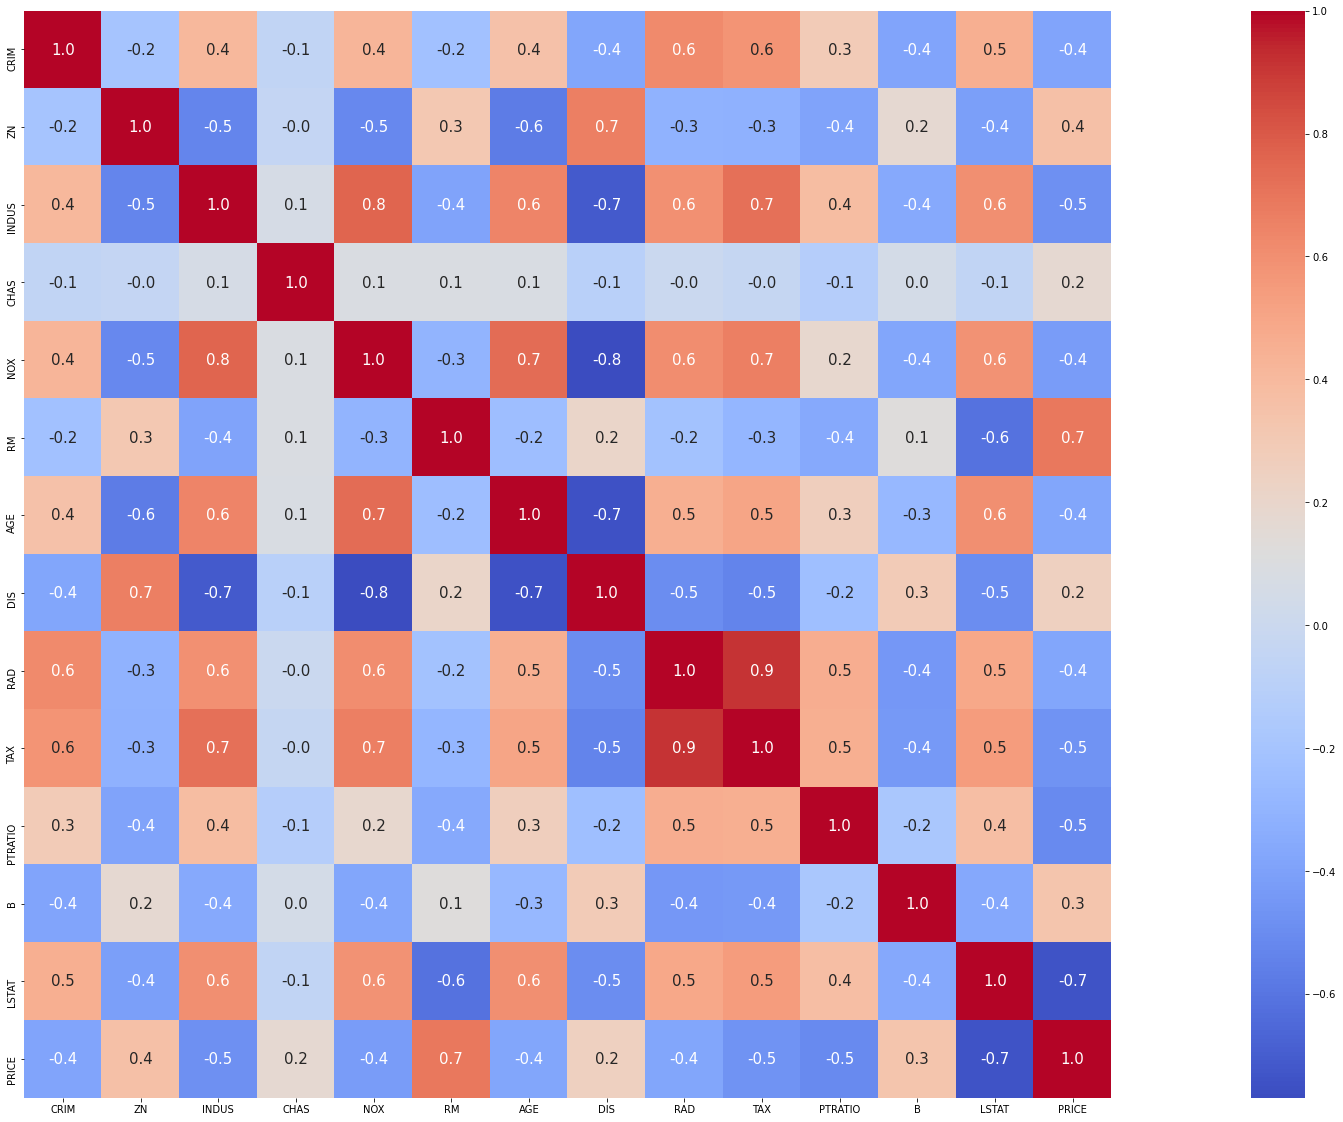

In [30]:
plt.figure(figsize=(50,20))
sns.heatmap(cor, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='coolwarm')

In [31]:
X = df.iloc[:,0:13]
y = df.iloc[:,-1]
print("Linear Regression..")
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)
lr = LinearRegression()
lr.fit(X_train,y_train)

Linear Regression..


LinearRegression()

In [32]:
y_pred = lr.predict(X_train)
print("Training:",lr.score(X_train,y_train)*100)
print("Test: ",lr.score(X_test,y_test)*100)
print("Model:",r2_score(y,lr.predict(X))*100)

Training: 77.30135569264233
Test:  58.92223849182518
Model: 73.73440319905036


Text(0, 0.5, 'PREDICTION')

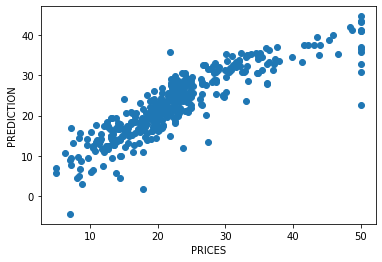

In [33]:
plt.scatter(y_train,y_pred)
plt.xlabel("PRICES")
plt.ylabel("PREDICTION")


Text(0, 0.5, 'RESIDUALS')

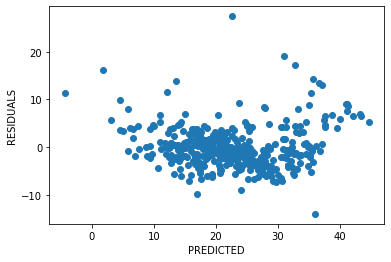

In [35]:
plt.scatter(y_pred,y_train-y_pred)
plt.xlabel("PREDICTED")
plt.ylabel("RESIDUALS")

Text(0, 0.5, 'FREQUENCY')

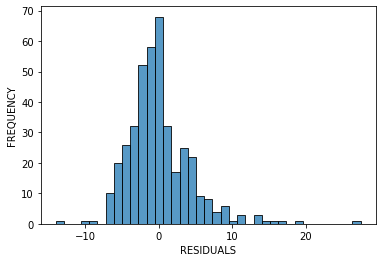

In [36]:
sns.histplot(y_train-y_pred)
plt.xlabel("RESIDUALS")
plt.ylabel("FREQUENCY")


In [40]:
X = df.iloc[:,[-1,5,10,4,9]]
y = df.iloc[:,[-1]]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4)
r = RandomForestRegressor()
r.fit(X_train,y_train)

<ipython-input-40-91b9d256ad8f>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  r.fit(X_train,y_train)


RandomForestRegressor()

In [41]:
y_pred = r.predict(X_train)
print("TRAIN:",r.score(X_train,y_train)*100)
print("TEST:",r.score(X_test,y_test)*100)

TRAIN: 99.99171476595285
TEST: 99.86775633152428


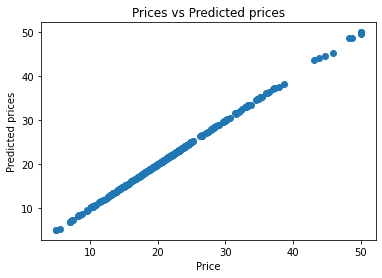

In [42]:
plt.scatter(y_train,y_pred)
plt.xlabel("Price")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

In [43]:
print("Prediction is done :) ")

Prediction is done :) 
